<a href="https://colab.research.google.com/github/zobayer-al-mahmud/Image_classification_with_NN_vs_CNN/blob/main/Image_classification_with_NN_vs_CNN(Zobayer_Al_Mahmud).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, ReLU # Added Dropout, Conv2D, MaxPooling2D, BatchNormalization, ReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential # Duplicate import, can be removed
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D # Duplicate import, can be removed
from keras.utils import to_categorical # Duplicate import, can be removed
from keras import backend as K

# **2. Dataset Loading**

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
print(len(x_train))

60000


# **3. Preprocessing**

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images for NN (28*28 = 784)
x_train_nn = x_train.reshape(-1, 784)
x_test_nn = x_test.reshape(-1, 784)

# Reshape images for CNN (add a depth of 1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

print("Shape of x_train_nn:", x_train_nn.shape)
print("Shape of x_test_nn:", x_test_nn.shape)
print("Shape of x_train_cnn:", x_train_cnn.shape)
print("Shape of x_test_cnn:", x_test_cnn.shape)

Shape of x_train_nn: (60000, 784)
Shape of x_test_nn: (10000, 784)
Shape of x_train_cnn: (60000, 28, 28, 1)
Shape of x_test_cnn: (10000, 28, 28, 1)


# **4. Model Architecture**

# ***NN***

In [ ]:
model_nn = Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128),
    layers.BatchNormalization(),  # Normalize outputs of dense layer
    layers.ReLU(),  # Use ReLU instead of LeakyReLU
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.ReLU(), # Use ReLU instead of LeakyReLU
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_nn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_nn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train the model
history = model_nn.fit(x_train_nn, to_categorical(y_train), epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7705 - loss: 0.7061 - val_accuracy: 0.8512 - val_loss: 0.4137
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8737 - loss: 0.3524 - val_accuracy: 0.8585 - val_loss: 0.3960
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8901 - loss: 0.3057 - val_accuracy: 0.8618 - val_loss: 0.3881
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8990 - loss: 0.2751 - val_accuracy: 0.8360 - val_loss: 0.4135
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9074 - loss: 0.2547 - val_accuracy: 0.8762 - val_loss: 0.3486
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9155 - loss: 0.2326 - val_accuracy: 0.8740 - val_loss: 0.3647
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9215 - loss: 0.2191 - val_accuracy: 0.8673 - val_loss: 0.3785
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9272 - loss: 0.1990 - val_accuracy: 0.

In [ ]:
loss, accuracy = model_nn.evaluate(x_test_nn, to_categorical(y_test))

print(f"Test accuracy for NN model: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8729 - loss: 0.4724
Test accuracy for NN model: 87.28%


# ***CNN***

In [ ]:
# Define a function to create a model
def create_cnn_model():
    # create model
    model_cnn = Sequential()
    # Add convolutional layers
    model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model_cnn.add(MaxPooling2D((2, 2)))
    model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
    model_cnn.add(MaxPooling2D((2, 2)))
    model_cnn.add(Dropout(0.2))
    # Flatten and add dense layers
    model_cnn.add(Flatten())
    model_cnn.add(Dense(128, activation='relu'))
    model_cnn.add(Dense(10, activation='softmax'))
    # Compile model
    model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model_cnn

In [ ]:
model_cnn = create_cnn_model()
model_cnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history_cnn = model_cnn.fit(x_train_cnn, to_categorical(y_train), epochs=20, batch_size=128, validation_split=0.2)



Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7066 - loss: 0.8574 - val_accuracy: 0.8580 - val_loss: 0.4018
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8596 - loss: 0.3915 - val_accuracy: 0.8756 - val_loss: 0.3453
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8771 - loss: 0.3388 - val_accuracy: 0.8873 - val_loss: 0.3216
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8912 - loss: 0.3020 - val_accuracy: 0.8888 - val_loss: 0.2983
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8950 - loss: 0.2842 - val_accuracy: 0.8938 - val_loss: 0.2872
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9046 - loss: 0.2580 - val_accuracy: 0.9048 - val_loss: 0.2659
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9110 - loss: 0.2417 - val_accuracy: 0.9046 - val_loss: 0.2584
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9160 - loss: 0.2283 - val_accuracy: 0.

In [ ]:
# Evaluate the CNN model
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test_cnn, to_categorical(y_test))

print(f"Test accuracy for CNN model: {accuracy_cnn * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9178 - loss: 0.2570
Test accuracy for CNN model: 91.71%


# **5. Compare Performance**

Test accuracy for NN model: 87.28%
Test accuracy for CNN model: 91.71%

Sample Predictions for NN Model:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Sample Predictions for CNN Model:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


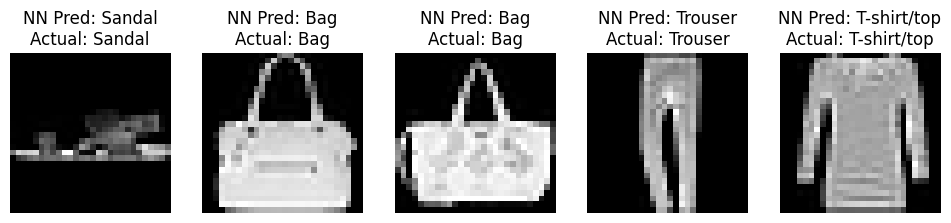

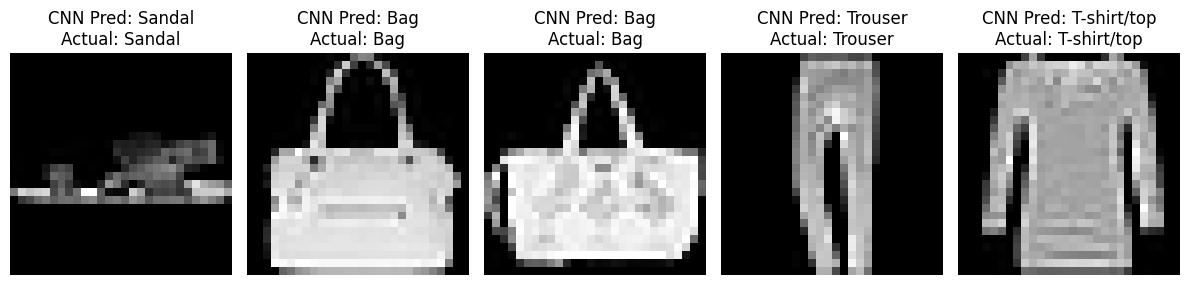

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display Test Accuracies
print(f"Test accuracy for NN model: {accuracy * 100:.2f}%")
print(f"Test accuracy for CNN model: {accuracy_cnn * 100:.2f}%")

# Show sample predictions for NN model
print("\nSample Predictions for NN Model:")
predictions_nn = model_nn.predict(x_test_nn)
sample_indices = np.random.choice(len(x_test_nn), 5) # Generate random indices once

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    predicted_label = class_names[np.argmax(predictions_nn[idx])]
    actual_label = class_names[y_test[idx]]
    plt.title(f"NN Pred: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')

# Show sample predictions for CNN model
print("\nSample Predictions for CNN Model:")
predictions_cnn = model_cnn.predict(x_test_cnn)
# Use the same sample_indices for CNN

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 6) # Offset subplot index for the second row
    plt.imshow(x_test[idx], cmap='gray')
    predicted_label = class_names[np.argmax(predictions_cnn[idx])]
    actual_label = class_names[y_test[idx]]
    plt.title(f"CNN Pred: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

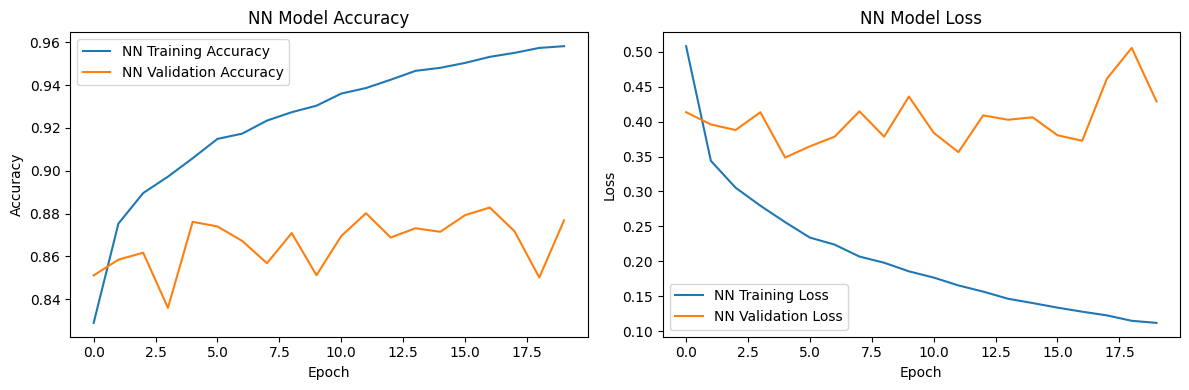

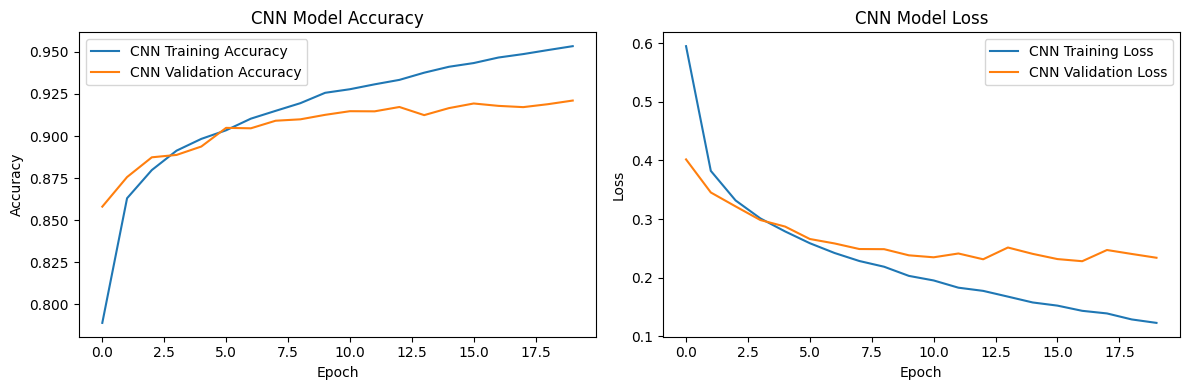

In [ ]:
import matplotlib.pyplot as plt

# Plot training history for NN model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='NN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='NN Validation Accuracy')
plt.title('NN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='NN Training Loss')
plt.plot(history.history['val_loss'], label='NN Validation Loss')
plt.title('NN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training history for CNN model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Comparison

NN accuracy: 87.28% | CNN accuracy: 91.17% | CNN is better by ~5%

CNN is better because it learns small image patterns (edges, textures) and keeps spatial structure, while NN only sees flat pixel lists and loses that structure.